In [58]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import math as math
import nsfg
import random
import first
import thinkstats2
import chap01soln
import statsmodels.formula.api as smf

In [19]:
live, firsts, others = first.MakeFrames()
formula = 'totalwgt_lb ~ agepreg'
model = smf.ols(formula, data=live)
results = model.fit()

In [20]:
results.params

Intercept    6.830397
agepreg      0.017454
dtype: float64

In [21]:
results.pvalues

Intercept    0.000000e+00
agepreg      5.722947e-11
dtype: float64

In [22]:
results.f_pvalue

5.7229471072528111e-11

In [41]:
print results.resid.shape
model.data.frame.shape


(9038,)


(9148, 244)

In [51]:
results = smf.ols('totalwgt_lb ~ agepreg', data=live).fit()
slope = results.params['agepreg']
print results.summary2()
print 0.0175/0.0027  

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.005     
Dependent Variable: totalwgt_lb      AIC:                31797.6445
Date:               2016-07-31 13:38 BIC:                31811.8629
No. Observations:   9038             Log-Likelihood:     -15897.   
Df Model:           1                F-statistic:        43.02     
Df Residuals:       9036             Prob (F-statistic): 5.72e-11  
R-squared:          0.005            Scale:              1.9741    
---------------------------------------------------------------------
              Coef.    Std.Err.      t       P>|t|    [0.025   0.975]
---------------------------------------------------------------------
Intercept     6.8304     0.0680   100.4698   0.0000   6.6971   6.9637
agepreg       0.0175     0.0027     6.5588   0.0000   0.0122   0.0227
-------------------------------------------------------------------
Omnibus:              1024.052      Durbin-Watson:      

In [55]:
live['is_first'] = live.birthord==1
live['agepreg2'] = live.agepreg**2
results = smf.ols('totalwgt_lb ~ is_first + agepreg + agepreg2', data = live).fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.007     
Dependent Variable: totalwgt_lb      AIC:                31776.8781
Date:               2016-07-31 13:59 BIC:                31805.3149
No. Observations:   9038             Log-Likelihood:     -15884.   
Df Model:           3                F-statistic:        22.64     
Df Residuals:       9034             Prob (F-statistic): 1.35e-14  
R-squared:          0.007            Scale:              1.9691    
-------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept            5.6923   0.2855 19.9373 0.0000  5.1326  6.2519
is_first[T.True]    -0.0504   0.0315 -1.6022 0.1091 -0.1122  0.0113
agepreg              0.1124   0.0220  5.1135 0.0000  0.0693  0.1555
agepreg2            -0.0018   0.0004 -4.4472 0.0000 -0.0027 -0.0010
-------------------------------------------------------------------
Omnibus:              1007.149      Durbin-Watson:         1.616   
Prob(Omnibus):        0.000         Jarque-Bera (JB):      3003.343
Skew:                 -0.594        Prob(JB):              0.000   
Kurtosis:             5.562         Condition No.:         13886   
===================================================================
* The condition number is large (1e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [64]:
live = live[live.prglngth>30]
resp = chap01soln.ReadFemResp()
resp.index = resp.caseid
join = live.join(resp, on='caseid',rsuffix='_r')

#### Loop on all columns and compute Rsquare for total_weight vs (ageprg +column)

In [134]:
r_square_list = []

for c in join.columns:
    try:
        if join[c].std()<1e-7:
            continue

        formule = 'totalwgt_lb ~ agepreg +'+ str(c)
        
        result = smf.ols(formula=formule, data = join).fit()
        if result.nobs< len(join)/2:
            continue

       
    except (ValueError,TypeError):
        continue
    r_square_list.append((result.rsquared,str(c)))
    
df = pd.DataFrame(r_square_list, columns=['r2','col_name'])
df=df.sort_values(by='r2',ascending=False)
df.head(10)

,r2,col_name
107,1.000000,totalwgt_lb
12,0.949813,birthwgt_lb
49,0.300824,lbw1
39,0.130125,prglngth
8,0.123400,wksgest
44,0.102031,agecon
9,0.027144,mosgest
11,0.018551,babysex
62,0.016200,race
517,0.016200,race_r


 1- result.mse_resid/result.mse_total =  0.0131569459146
join.totalwgt_lb.std() =  1.61599234574
MSE TOTAL 1.61599234574
                            OLS Regression Results                            
Dep. Variable:            totalwgt_lb   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     118.1
Date:                Sun, 31 Jul 2016   Prob (F-statistic):           2.51e-27
Time:                        14:57:55   Log-Likelihood:                -14508.
No. Observations:                8781   AIC:                         2.902e+04
Df Residuals:                    8779   BIC:                         2.903e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------

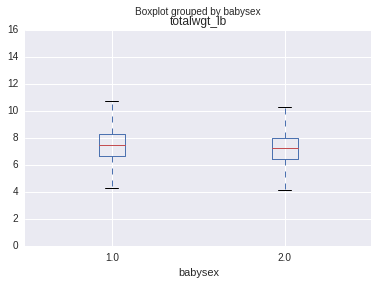

In [130]:
result = smf.ols('totalwgt_lb ~ babysex',data=join).fit()
print  "1- result.mse_resid/result.mse_total = ",1- result.mse_resid/result.mse_total
print "join.totalwgt_lb.std() = ", (join.totalwgt_lb.std())**2
print "MSE TOTAL"  , result.mse_total
print result.summary()
join.boxplot("totalwgt_lb",by='babysex')



In [132]:
formula = ('totalwgt_lb ~ agepreg + C(race) + babysex==1 + '
'nbrnaliv>1 + paydu==1 + totincr')
result = smf.ols(formula,data=join).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     79.98
Date:                Sun, 31 Jul 2016   Prob (F-statistic):          4.86e-113
Time:                        15:03:03   Log-Likelihood:                -14295.
No. Observations:                8781   AIC:                         2.861e+04
Df Residuals:                    8773   BIC:                         2.866e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                6.6303      0.065    102.223      0.000         6.503     6.757
C(race)[T.2]             0.3570      0.032     11.215      0.000         0.295     0.419
C(race)[T.3]             0.2665      0.051      5.175      0.000         0.166     0.367
babysex == 1[T.True]     0.2952      0.026     11.216      0.000         0.244     0.347
nbrnaliv > 1[T.True]    -1.3783      0.108    -12.771      0.000        -1.590    -1.167
paydu == 1[T.True]       0.1196      0.031      3.861      0.000         0.059     0.180
agepreg                  0.0074      0.003      2.921      0.004         0.002     0.012
totincr                  0.0122      0.004      3.110      0.002         0.005     0.020
==============================================================================
Omnibus:                      398.813   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1388.362
Skew:                          -0.037   Prob(JB):                    3.32e-302
Kurtosis:                       4.947   Cond. No.                         221.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
join.groupby('race').count()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,pubassis_i_r,basewgt_r,adj_mod_basewgt_r,finalwgt_r,secu_r,sest_r,cmintvw_r,cmlstyr,screentime,intvlngth
race,,,,,,,,,,,,,,,,,,,,,
1,2330,2330,0,0,0,0,2330,3,2327,41,...,2330,2330,2330,2330,2330,2330,2330,2330,2330,2330
2,5762,5762,0,0,0,0,5762,3,5761,88,...,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762
3,792,792,0,0,0,0,792,2,792,5,...,792,792,792,792,792,792,792,792,792,792
